In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data = pd.read_csv('/content/churn.csv')
data

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7041,5067-WJEUN,NaN,0.0,Yes,Yes,67.0,Two year,Yes,Bank transfer (automatic),54.20,3838.20,No
7042,3866-MDTUB,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.75,146.90,Yes
7043,8434-PNQZX,Female,0.0,No,No,42.0,Two year,Yes,Credit card (automatic),78.45,3373.40,No
7044,2921-XWDJH,Female,1.0,Yes,No,38.0,Month-to-month,Yes,Electronic check,83.45,3147.15,No


In [ ]:
data.isnull().sum()

customerID           9
Gender              16
SeniorCitizen       12
Partner             16
Dependents          19
Tenure              17
Contract            13
PaperlessBilling    13
PaymentMethod       11
MonthlyCharges      10
TotalCharges         0
Churn                0
dtype: int64

In [ ]:
data1 = data.dropna(how='any')
data1.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0.0,No,No,8.0,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [ ]:
data1.loc[data1.duplicated(), :]

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7032,2905-KFQUV,Female,0.0,Yes,No,2.0,Month-to-month,Yes,Credit card (automatic),70.40,154.80,No
7033,9253-QXKBE,Male,1.0,Yes,No,29.0,Month-to-month,Yes,Electronic check,94.45,2653.65,Yes
7034,6418-HNFED,Male,0.0,Yes,No,51.0,Two year,Yes,Credit card (automatic),83.25,4089.45,No
7035,4795-UXVCJ,Male,0.0,No,No,26.0,One year,No,Credit card (automatic),19.80,457.30,No
7036,3606-SBKRY,Male,0.0,No,No,31.0,One year,Yes,Electronic check,50.05,1523.40,No
7037,5233-GEEAX,Male,1.0,No,No,8.0,Month-to-month,Yes,Electronic check,29.40,221.90,Yes
7038,6000-UKLWI,Male,0.0,No,No,41.0,Two year,No,Mailed check,20.15,802.35,No
7039,2236-HILPA,Male,0.0,Yes,Yes,62.0,Two year,No,Credit card (automatic),20.65,1218.45,No
7040,2342-CKIAO,Female,0.0,No,No,2.0,Month-to-month,No,Mailed check,20.30,41.20,No
7042,3866-MDTUB,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.75,146.90,Yes


In [ ]:
data2 = data1.drop_duplicates(keep=False)
data2

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0.0,No,No,8.0,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0.0,Yes,Yes,24.0,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0.0,Yes,Yes,72.0,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0.0,Yes,Yes,11.0,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1.0,Yes,No,4.0,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
le = LabelEncoder()
data2['Partner'] = le.fit_transform(data2['Partner'])
data2['Dependents'] = le.fit_transform(data2['Dependents'])
data2['Paperlessbilling'] = le.fit_transform(data2['PaperlessBilling'])
data2['Churn'] = le.fit_transform(data2['Churn'])
data2['Gender'] = le.fit_transform(data2['Gender'])
data2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Paperlessbilling
1,5575-GNVDE,1,0.0,0,0,34.0,One year,No,Mailed check,56.95,1889.50,0,0
2,3668-QPYBK,1,0.0,0,0,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,1,0.0,0,0,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,0,0
4,9237-HQITU,0,0.0,0,0,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,1,1
5,9305-CDSKC,0,0.0,0,0,8.0,Month-to-month,Yes,Electronic check,99.65,820.50,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0.0,1,1,24.0,One year,Yes,Mailed check,84.80,1990.50,0,1
7028,2234-XADUH,0,0.0,1,1,72.0,One year,Yes,Credit card (automatic),103.20,7362.90,0,1
7029,4801-JZAZL,0,0.0,1,1,11.0,Month-to-month,Yes,Electronic check,29.60,346.45,0,1
7030,8361-LTMKD,1,1.0,1,0,4.0,Month-to-month,Yes,Mailed check,74.40,306.60,1,1


In [ ]:
data3 = pd.get_dummies(data2)
data3

,Gender,SeniorCitizen,Partner,Dependents,Tenure,MonthlyCharges,TotalCharges,Churn,Paperlessbilling,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,customerID_0015-UOCOJ,customerID_0016-QLJIS,customerID_0017-DINOC,customerID_0018-NYROU,customerID_0019-EFAEP,customerID_0019-GFNTW,customerID_0020-INWCK,customerID_0020-JDNXP,customerID_0021-IKXGC,customerID_0022-TCJCI,customerID_0023-HGHWL,customerID_0023-UYUPN,customerID_0027-KWYKW,customerID_0030-FNXPP,customerID_0032-PGELS,customerID_0036-IHMOT,customerID_0040-HALCW,customerID_0042-JVWOJ,customerID_0042-RLHYP,customerID_0048-LUMLS,customerID_0048-PIHNL,customerID_0052-DCKON,customerID_0052-YNYOT,...,customerID_9947-OTFQU,customerID_9948-YPTDG,customerID_9950-MTGYX,customerID_9953-ZMKSM,customerID_9955-QOPOY,customerID_9957-YODKZ,customerID_9958-MEKUC,customerID_9959-WOFKT,customerID_9961-JBNMK,customerID_9962-BFPDU,customerID_9964-WBQDJ,customerID_9965-YOKZB,customerID_9967-ATRFS,customerID_9968-FFVVH,customerID_9970-QBCDA,customerID_9971-ZWPBF,customerID_9972-EWRJS,customerID_9972-NKTFD,customerID_9972-VAFJJ,customerID_9974-JFBHQ,customerID_9975-GPKZU,customerID_9975-SKRNR,customerID_9978-HYCIN,customerID_9979-RGMZT,customerID_9985-MWVIX,customerID_9986-BONCE,customerID_9987-LUTYD,customerID_9992-RRAMN,customerID_9992-UJOEL,customerID_9993-LHIEB,customerID_9995-HOTOH,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,1,0.0,0,0,34.0,56.95,1889.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
2,1,0.0,0,0,2.0,53.85,108.15,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,1,0.0,0,0,45.0,42.30,1840.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
4,0,0.0,0,0,2.0,70.70,151.65,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
5,0,0.0,0,0,8.0,99.65,820.50,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0.0,1,1,24.0,84.80,1990.50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
7028,0,0.0,1,1,72.0,103.20,7362.90,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
7029,0,0.0,1,1,11.0,29.60,346.45,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
7030,1,1.0,1,0,4.0,74.40,306.60,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
from sklearn.feature_selection import VarianceThreshold
var_data = VarianceThreshold(threshold=0.8)
var_data.fit(data3)

VarianceThreshold(threshold=0.8)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
data3['Churn']= label_encoder.fit_transform(data2['Churn'])


In [ ]:
X = data3.drop(columns='Churn').to_numpy()
y = data3[['Churn']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
ridge_data3 = Ridge(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20)
}

ridge_reg_data3_gridcv = GridSearchCV(ridge_data3, parameters, cv=5, scoring='neg_root_mean_squared_error', error_score='raise')
ridge_reg_data3_gridcv.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise', estimator=Ridge(random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20)},
             scoring='neg_root_mean_squared_error')

In [ ]:
pd.DataFrame(ridge_reg_data3_gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6.497288,0.098672,0.016477,0.001939,1e-06,{'alpha': 1e-06},-0.373949,-0.377001,-0.375557,-0.387537,-0.385016,-0.379812,0.005425,7
1,6.442518,0.057744,0.014574,0.002055,1e-05,{'alpha': 1e-05},-0.373949,-0.377001,-0.375557,-0.387537,-0.385016,-0.379812,0.005425,8
2,6.415053,0.027308,0.015871,0.001890,0.0001,{'alpha': 0.0001},-0.373949,-0.377001,-0.375557,-0.387537,-0.385016,-0.379812,0.005425,10
3,6.421832,0.065731,0.013882,0.001673,0.001,{'alpha': 0.001},-0.373949,-0.377001,-0.375557,-0.387537,-0.385016,-0.379812,0.005425,9
4,6.451038,0.044004,0.015408,0.002258,0.01,{'alpha': 0.01},-0.373949,-0.377001,-0.375557,-0.387537,-0.385016,-0.379812,0.005425,6
5,6.594835,0.083172,0.017770,0.000606,0.1,{'alpha': 0.1},-0.373949,-0.377001,-0.375556,-0.387537,-0.385016,-0.379812,0.005425,5
6,6.486518,0.035534,0.015337,0.002297,1,{'alpha': 1},-0.373950,-0.377000,-0.375553,-0.387534,-0.385019,-0.379811,0.005425,4
7,6.490088,0.036488,0.016701,0.001771,5,{'alpha': 5},-0.373950,-0.376995,-0.375539,-0.387522,-0.385031,-0.379807,0.005427,3
8,6.461003,0.052495,0.014298,0.002459,10,{'alpha': 10},-0.373950,-0.376989,-0.375521,-0.387508,-0.385045,-0.379803,0.005429,2
9,6.468784,0.071848,0.016608,0.001300,20,{'alpha': 20},-0.373953,-0.376978,-0.375487,-0.387480,-0.385075,-0.379794,0.005433,1


In [ ]:
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(ridge_reg_data3_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1e-06},-0.379812,7
1,{'alpha': 1e-05},-0.379812,8
2,{'alpha': 0.0001},-0.379812,10
3,{'alpha': 0.001},-0.379812,9
4,{'alpha': 0.01},-0.379812,6
5,{'alpha': 0.1},-0.379812,5
6,{'alpha': 1},-0.379811,4
7,{'alpha': 5},-0.379807,3
8,{'alpha': 10},-0.379803,2
9,{'alpha': 20},-0.379794,1


In [ ]:
ridge_reg_data3_gridcv.best_estimator_

Ridge(alpha=20, random_state=42)

In [ ]:
ridge_reg_data3_gridcv.best_estimator_.coef_

array([ 8.99552629e-05,  5.24025747e-02, -3.80127614e-03, ...,
       -2.30926946e-02,  6.22182230e-02, -2.70749478e-02])

In [ ]:
ridge_reg_data3_gridcv.best_estimator_.intercept_

0.07228964720220848

In [ ]:
coef_df = pd.DataFrame({
    'feature':['intercept'] + data3.drop(columns='Churn').columns.tolist(),
    'coefficient':[ridge_reg_data3_gridcv.best_estimator_.intercept_] + list(ridge_reg_data3_gridcv.best_estimator_.coef_)
})

coef_df

,feature,coefficient
0,intercept,0.072290
1,Gender,0.000090
2,SeniorCitizen,0.052403
3,Partner,-0.003801
4,Dependents,-0.035294
...,...,...
6898,PaperlessBilling_Yes,0.020495
6899,PaymentMethod_Bank transfer (automatic),-0.012051
6900,PaymentMethod_Credit card (automatic),-0.023093
6901,PaymentMethod_Electronic check,0.062218


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

y_pred = ridge_reg_data3_gridcv.best_estimator_.predict(X_test)
print(f'the r2_score of the best model is {r2_score(y_pred,y_test)}')
print(f'the root_mean_squared_error of the best model is {mean_squared_error(y_pred,y_test)}')
print(f'the median_absolute_error of the best model is {median_absolute_error(y_pred,y_test)}')

the r2_score of the best model is -1.574240599243737
the root_mean_squared_error of the best model is 0.13350073388458672
the median_absolute_error of the best model is 0.2606830148186817


In [ ]:
#using KNN model 
from sklearn.model_selection import train_test_split

X = data3.drop(columns='Churn').to_numpy()
y = data3[['Churn']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [ ]:
data3['Churn'].value_counts()

0    5063
1    1822
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}


knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall') #using recall due to imbalance data
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                         'weights': ('uniform', 'distance')},
             scoring='recall')

In [ ]:
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'n_neighbors': 2, 'weights': 'uniform'}",0.252649,14
1,"{'n_neighbors': 2, 'weights': 'distance'}",0.470414,1
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.411351,4
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.435604,2
4,"{'n_neighbors': 4, 'weights': 'uniform'}",0.268865,13
5,"{'n_neighbors': 4, 'weights': 'distance'}",0.414198,3
6,"{'n_neighbors': 5, 'weights': 'uniform'}",0.371027,9
7,"{'n_neighbors': 5, 'weights': 'distance'}",0.392541,5
8,"{'n_neighbors': 6, 'weights': 'uniform'}",0.279604,12
9,"{'n_neighbors': 6, 'weights': 'distance'}",0.381838,6


best moodel K = 2 distance = 'distance'

In [ ]:
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      4058
           1       0.45      0.47      0.46      1450

    accuracy                           0.71      5508
   macro avg       0.63      0.63      0.63      5508
weighted avg       0.71      0.71      0.71      5508



In [ ]:
X = data3.drop(columns=['TotalCharges','Churn']).to_numpy()

from sklearn.cluster import KMeans

# track sum of squared error
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

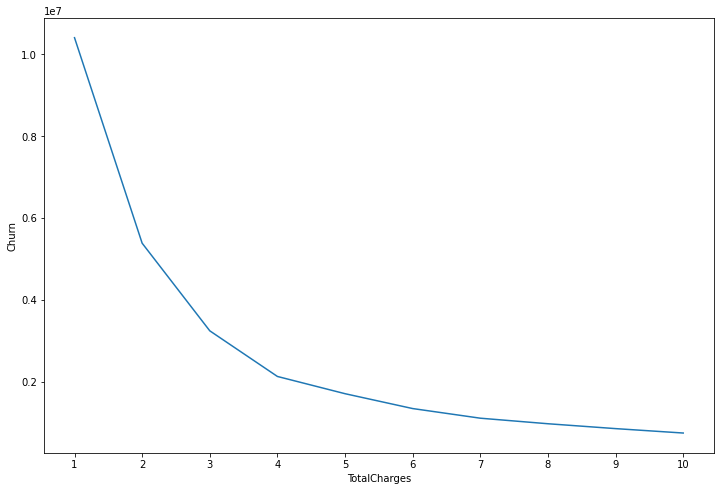

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel('TotalCharges')
plt.ylabel('Churn')
plt.show()

elbow point is at K = 0.5